In [466]:
# !pip uninstall numpy
# !pip install numpy==2.1.1

In [467]:
# !pip install tensorflow-cpu==2.13.0

In [468]:
# !pip install matplotlib ipympl

In [469]:
# !pip install skimpy 

In [470]:
# !pip install statsmodels==0.14.4

In [471]:
# !pip install prophet

In [472]:
# !pip install seaborn

In [473]:
# !pip install scipy

In [474]:
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
import seaborn as sns
import tensorflow as tf
warnings.filterwarnings(action='ignore')

In [475]:
# Load the dataset (adjust file path and format as needed)
df = pd.read_csv(r"C:\Users\prakh\Desktop\Research_Project\Research_Project_B\satellite_data\orbital_elements\Fengyun-2F.csv", parse_dates=[0])  # Assuming first column is datetime

# Rename columns to remove spaces
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert datetime column to proper format (if not done already)
#df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], dayfirst=True)  # Adjust based on date format

# Convert numeric columns to float (excluding datetime column)
#df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# Handle missing values (fill or drop)
df.dropna(inplace=True)  # Or df.fillna(value, inplace=True)

# Display processed data
print(df.head())

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)
df.rename(columns={'Unnamed:_0':'Datetime'},inplace=True)
df.set_index("Datetime",inplace=True)

                  Unnamed:_0  eccentricity  argument_of_perigee  inclination  \
0 2012-09-06 18:48:32.050655      0.000488             4.483911     0.032940   
1 2012-09-07 19:39:45.383327      0.000487             4.481215     0.032901   
2 2012-09-08 15:43:39.075167      0.000487             4.475122     0.032868   
3 2012-09-09 12:53:36.595967      0.000492             4.481063     0.032835   
4 2012-09-10 13:15:22.135391      0.000495             4.512943     0.032798   

   mean_anomaly  Brouwer_mean_motion  right_ascension  
0     -2.689729             0.004374         4.842139  
1     -2.446726             0.004374         4.842234  
2     -3.457326             0.004374         4.842332  
3     -4.190783             0.004374         4.842201  
4     -4.111348             0.004374         4.842257  


In [476]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2985   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 6      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ eccentri │  0 │    0 │ 0.000268 │ 0.000140 │ 1.62e-05 │ 0.000164 │ 0.000253 │ 0.000359 │ 0.002877 │   ▇    │  │
│ │ city     │    │      │          │        7 │          │        1 │        5 │        5 │          │        │  │
│ │ argument │  0 │    0 │    3.081 │    1.578 │ 0.002423 │    1.881 │    3.513 │    4.236 │    6.283 │ ▅▂▃▇▆▁ │  │
│ │ _of_peri │    │      │          │          │          │          │          │          │          │        │  │
│ │ gee      │    │      │          │          │          │          │          │          │          │        │  │
│ │ inclinat │  0 │    0 │  0.02701 │  0.01448 │ 0.002838 │  0.01557 │  0.02606 │  0.03834 │  0.05956 │ ▇▇▇▆▅▂ │  │
│ │ ion      │    │      │          │          │          │          │          │          │          │        │  │
│ │ mean_ano │  0 │    0 │   -3.231 │    1.783 │   -6.281 │   -4.663 │   -3.433 │   -1.669 │ -0.00233 │ ▆▇▇▆▆▆ │  │
│ │ maly     │    │      │          │          │          │          │          │          │        7 │        │  │
│ │ Brouwer_ │  0 │    0 │ 0.004375 │ 3.378e-0 │ 0.004374 │ 0.004375 │ 0.004375 │ 0.004375 │ 0.004376 │  ▁▇▇▇  │  │
│ │ mean_mot │    │      │          │        7 │          │          │          │          │          │        │  │
│ │ ion      │    │      │          │          │          │          │          │          │          │        │  │
│ │ right_as │  0 │    0 │    2.188 │    1.567 │ 0.003768 │     1.36 │    1.424 │    1.458 │    6.202 │  ▇  ▂  │  │
│ │ cension  │    │      │          │          │          │          │          │          │          │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [477]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Fengyun-2F Data Summary", explorative=True)
profile.to_file("summary_report.html")  # Export to readable HTML

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 196.57it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[]

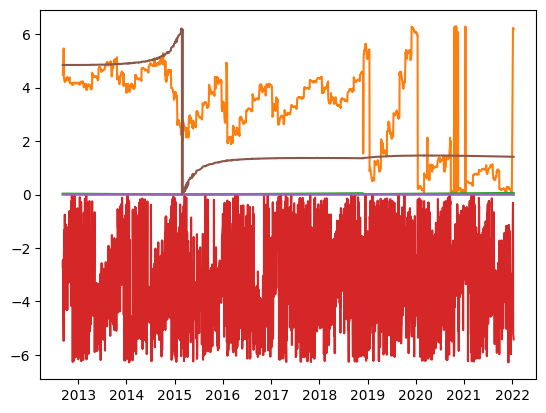

In [478]:
import matplotlib.pyplot as plt
plt.plot(df.index, df)
plt.plot()

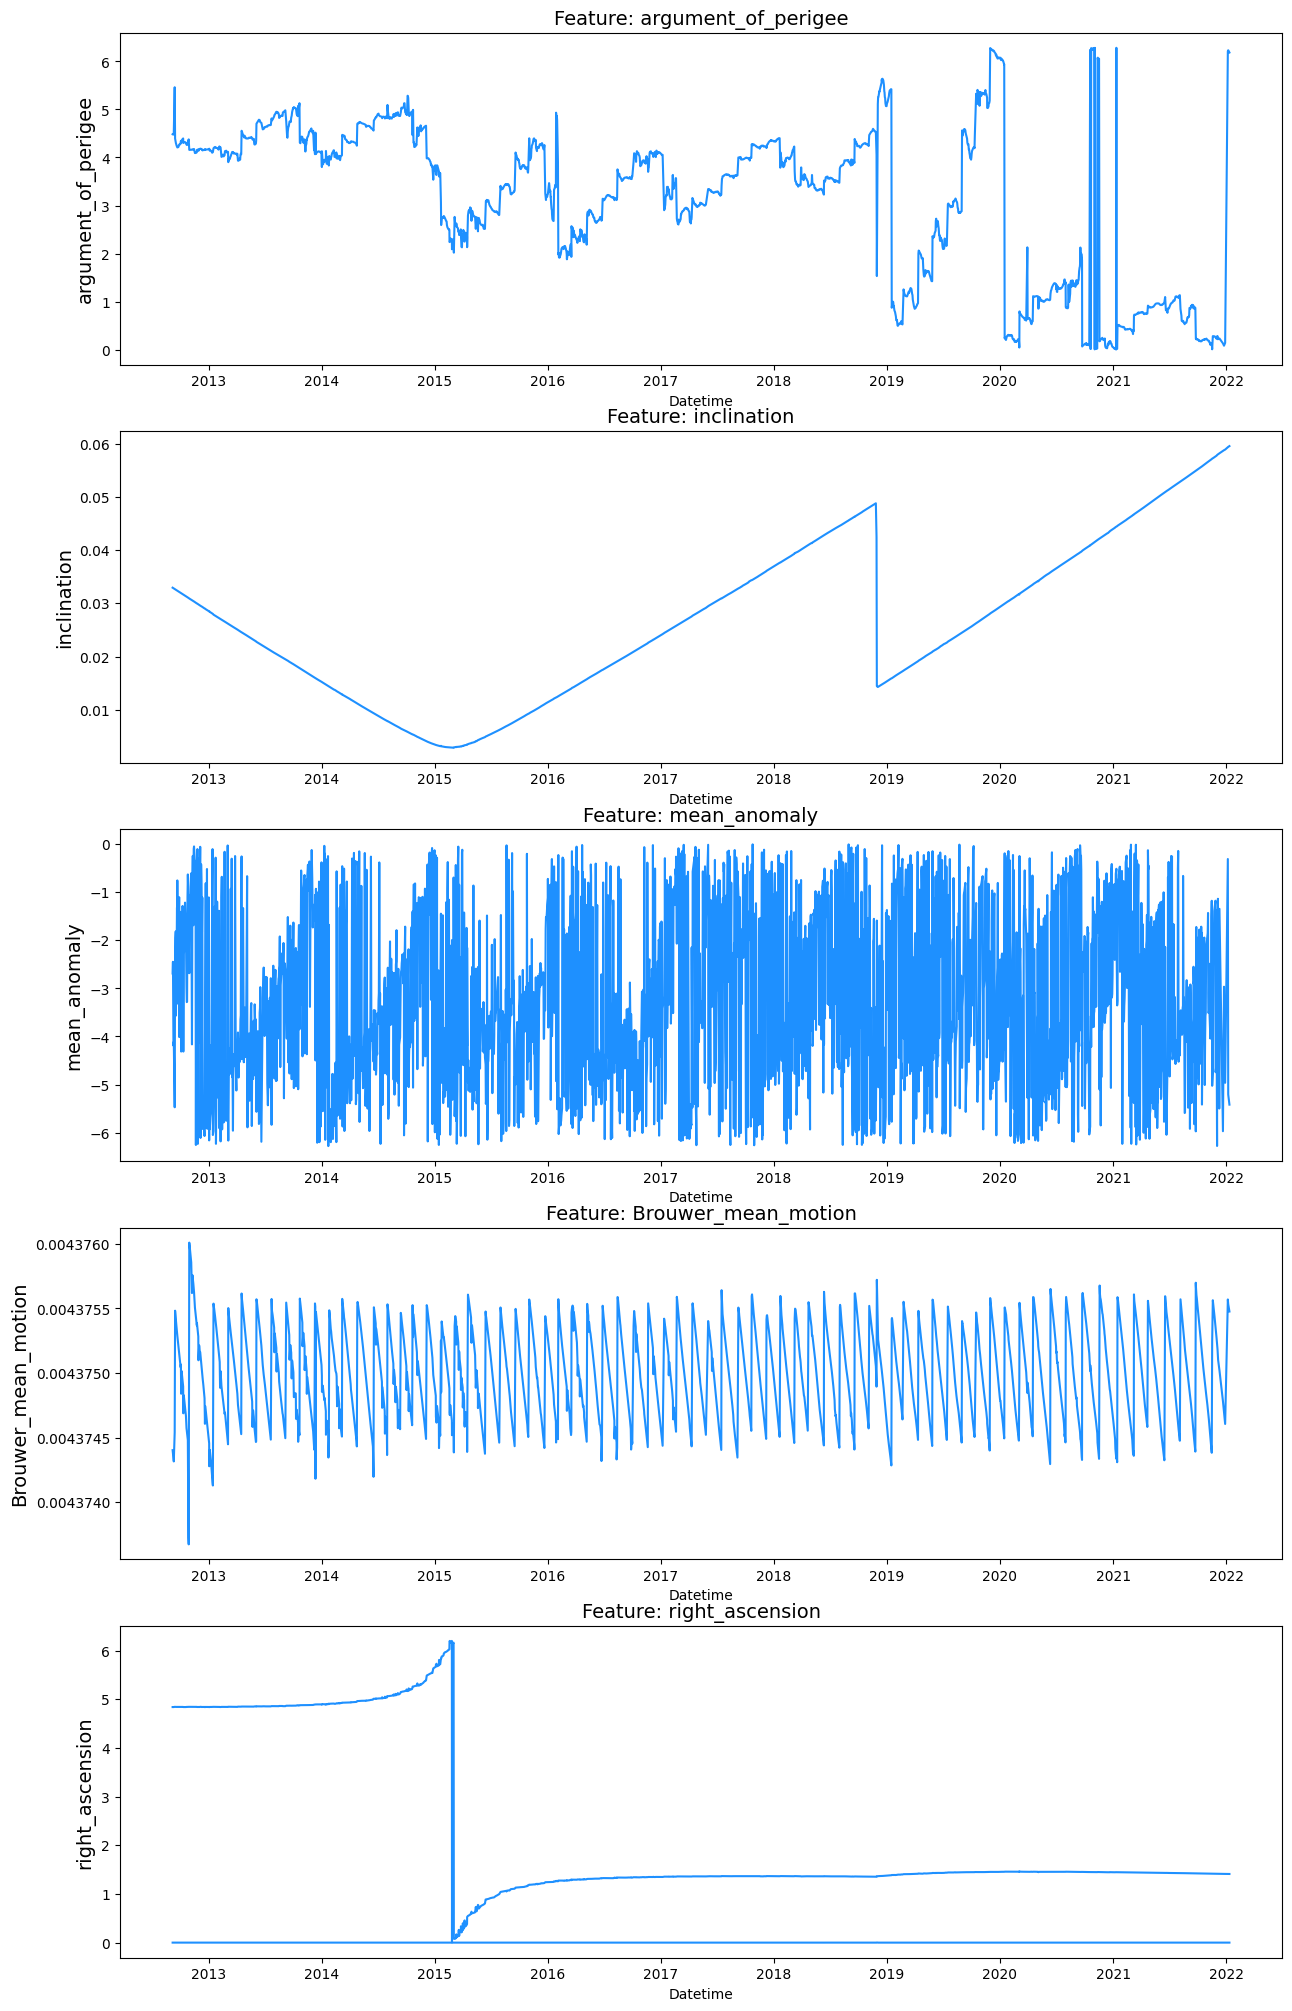

In [479]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[column].fillna(method='ffill'), ax=ax[i-1], color='dodgerblue')
    ax[i-1].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i-1].set_ylabel(ylabel=column, fontsize=14)
                      
   #ax[i].set_xlim(df.index, df)                

In [480]:
rolling_mean_eccentricity= df[:]['eccentricity'].rolling(window=12).mean()
rolling_std_eccentricity= df[:]['eccentricity'].rolling(window=12).std()

rolling_mean_argument_of_perigee= df[:]['argument_of_perigee'].rolling(window=12).mean()
rolling_std_argument_of_perigee= df[:]['argument_of_perigee'].rolling(window=12).std()

rolling_mean_inclination= df[:]['inclination'].rolling(window=12).mean()
rolling_std_inclination= df[:]['inclination'].rolling(window=12).std()

rolling_mean_mean_anomaly= df[:]['mean_anomaly'].rolling(window=12).mean()
rolling_std_mean_anomaly= df[:]['mean_anomaly'].rolling(window=12).std()

rolling_mean_Brouwer_mean_motion= df[:]['Brouwer_mean_motion'].rolling(window=12).mean()
rolling_std_Brouwer_mean_motion= df[:]['Brouwer_mean_motion'].rolling(window=12).std()

rolling_mean_right_ascension= df[:]['right_ascension'].rolling(window=12).mean()
rolling_std_right_ascension= df[:]['right_ascension'].rolling(window=12).std()

mean=df.rolling(window=12).mean()
std=df.rolling(window=12).std()

print(mean)
print(std)
#print(rolling_mean)
#print(rolling_std)

                            eccentricity  argument_of_perigee  inclination  \
Datetime                                                                     
2012-09-06 18:48:32.050655           NaN                  NaN          NaN   
2012-09-07 19:39:45.383327           NaN                  NaN          NaN   
2012-09-08 15:43:39.075167           NaN                  NaN          NaN   
2012-09-09 12:53:36.595967           NaN                  NaN          NaN   
2012-09-10 13:15:22.135391           NaN                  NaN          NaN   
...                                  ...                  ...          ...   
2021-12-25 04:39:15.108767      0.000360             0.218050     0.058125   
2021-12-28 21:00:18.080928      0.000361             0.210942     0.058220   
2022-01-06 13:25:24.541247      0.000376             0.707352     0.058343   
2022-01-07 18:42:19.086048      0.000390             1.203023     0.058467   
2022-01-11 17:26:36.259583      0.000402             1.695039   

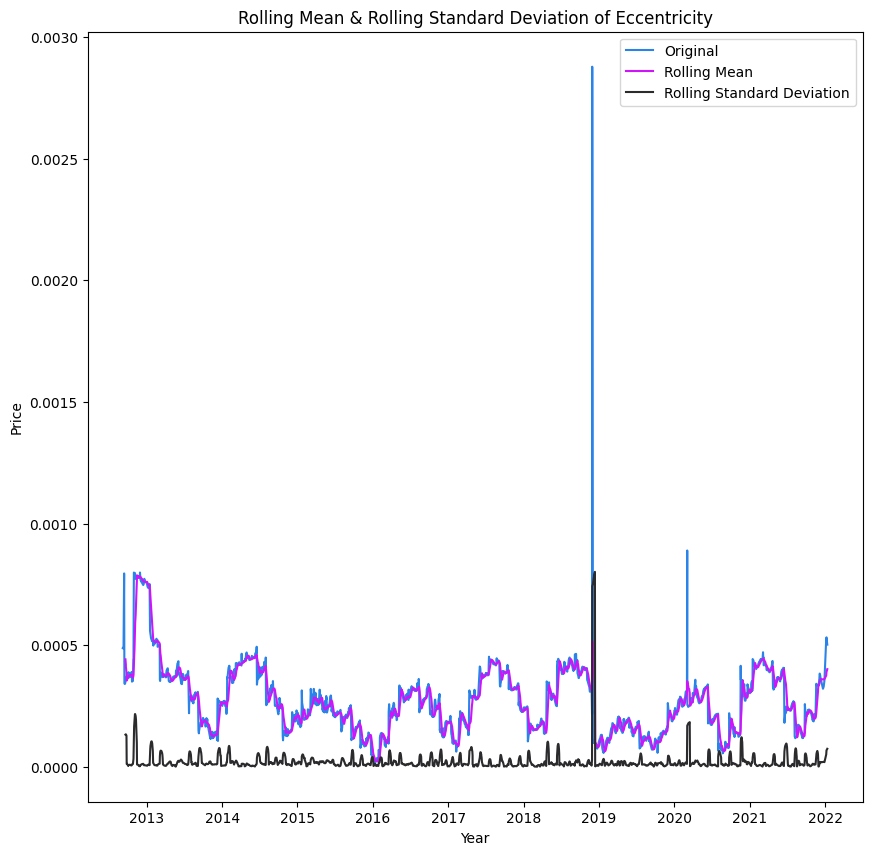

In [481]:
plt.figure(figsize=(10,10))

plt.plot(df[:]['eccentricity'], color = '#2a83e8', label = 'Original') #BLUE


plt.plot(rolling_mean_eccentricity, color = '#d014fa', label = 'Rolling Mean') #PINK
plt.plot(rolling_std_eccentricity, color = '#2b2b2e', label = 'Rolling Standard Deviation')  #BLACK

#plt.plot(rolling_mean_argument_of_perigee, color = '#a633ff', label = 'Rolling Mean') #PURPLR
#plt.plot(rolling_std_argument_of_perigee, color = '#ffd700', label = 'Rolling Standard Deviation') #YELLOW

plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Price') 
plt.title('Rolling Mean & Rolling Standard Deviation of Eccentricity')
plt.show()

# **Analysis of the Graph: Rolling Mean & Rolling Standard Deviation of Eccentricity**  

## **1. Understanding the Graph Components**
- **Blue Line (Original Data):** Represents the actual values of eccentricity over time.
- **Black Line (Rolling Standard Deviation):** Measures the variability (volatility) of eccentricity over time.

---

## **2. Key Insights**
### **A. General Trend of Eccentricity (Blue Line)**
- **2013 to 2018:**  
  - The eccentricity appears to have fluctuating but relatively stable values within a low range (~0.0005 or lower).
  - There are periodic variations, possibly indicating cyclic behavior.
- **2019:**  
  - A **sharp spike in eccentricity** is observed, reaching above 0.0025.
  - This could indicate a sudden anomaly or a temporary perturbation in the system.
- **2020 to 2022:**  
  - The eccentricity returns to lower values, fluctuating similarly to pre-2019 but showing a slight increasing trend.

### **B. Volatility Analysis (Black Line - Rolling Standard Deviation)**
- **2013 to 2018:**  
  - The rolling standard deviation remains **very low**, suggesting stable fluctuations.
- **2019:**  
  - A **significant increase in volatility** coincides with the large spike in eccentricity.
  - This suggests that the anomaly was not just a small deviation but part of a larger instability event.
- **2020 to 2022:**  
  - Volatility decreases again, though it remains slightly elevated compared to earlier years.

---

## **3. Possible Explanations for Observed Behavior**
### **The 2019 Anomaly**  
A sudden spike in eccentricity could be due to:
- **Orbital perturbations** (e.g., gravitational influence from the Moon, Sun, or other celestial bodies).
- **Atmospheric drag effects** (if in low Earth orbit).
- **Maneuvers or station-keeping adjustments**.
- **Data anomalies or measurement errors**.

### **Cyclic Behavior Pre- and Post-2019**  
- The periodic oscillations in eccentricity suggest a **natural variation in orbital shape**, potentially linked to:
  - The precession of the orbit.
  - Long-term gravitational perturbations.

### **Slight Upward Trend in Eccentricity (Post-2020)**  
- If the eccentricity continues increasing, it may indicate **orbital decay** or **external influences** modifying the orbit.

---

## **4. Key Takeaways**
✔ **Eccentricity remained relatively stable except for a major anomaly in 2019.**  
✔ **2019 saw an extreme spike in eccentricity, along with a surge in volatility.**  
✔ **Post-2020, eccentricity remains within a normal range but shows a slight increasing trend.**  
✔ **Potential causes include orbital perturbations, station-keeping events, or anomalies in data recording.**  
🚀


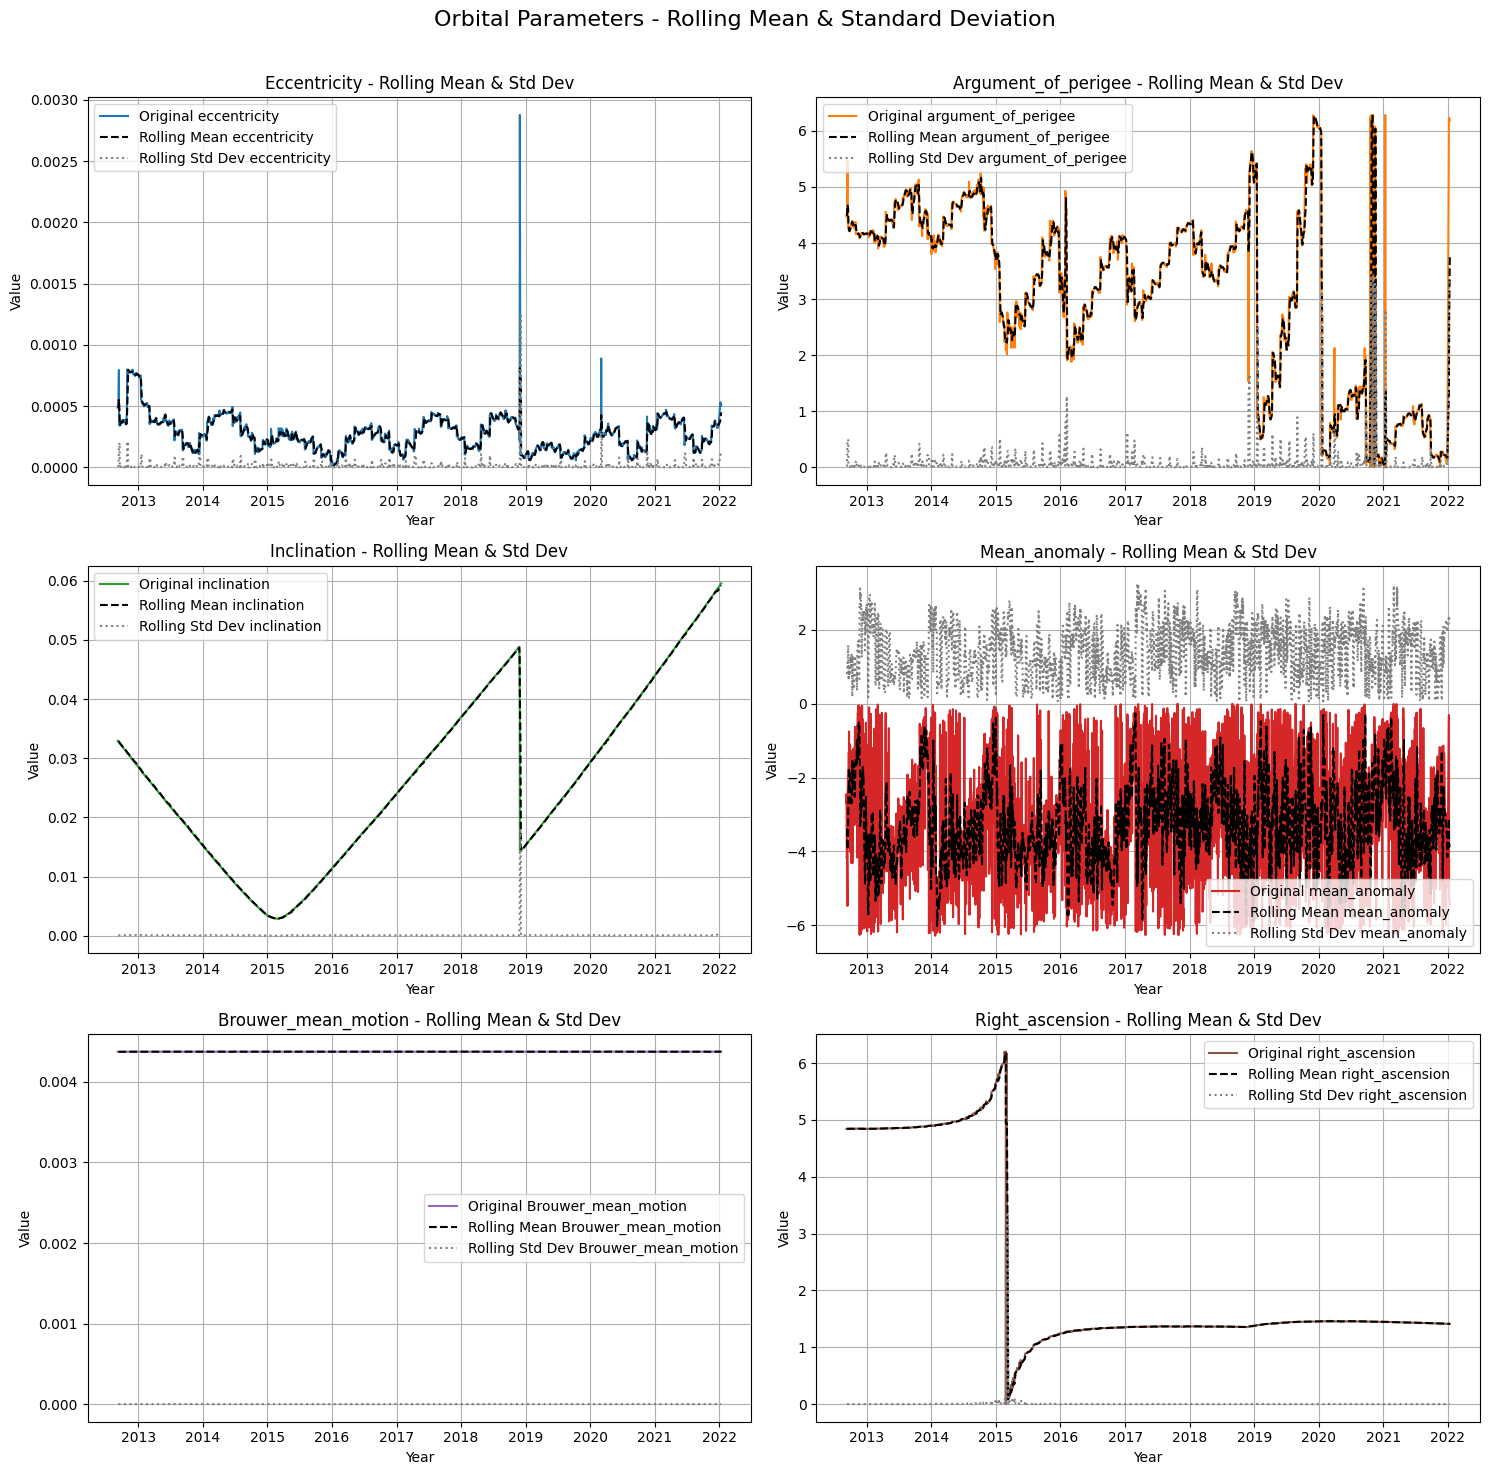

In [482]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#file_path = r"C:\Users\prakh\Desktop\Research_Project\satellite_data\orbital_elements\Fengyun-2F.csv"
#df = pd.read_csv(file_path)

# Define available parameters from the dataset
parameters = [
    "eccentricity", "argument_of_perigee", "inclination", 
    "mean_anomaly", "Brouwer_mean_motion", "right_ascension"
]

# Define colors for each parameter
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b"
]

# Rolling window size
rolling_window = 5  

# Compute rolling mean & standard deviation
rolling_data = {
    col: {
        "mean": df[col].rolling(rolling_window).mean(),
        "std": df[col].rolling(rolling_window).std()
    }
    for col in parameters
}

# Create subplots (3 rows, 2 columns) since we have 6 parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Orbital Parameters - Rolling Mean & Standard Deviation", fontsize=16)

# Loop through each parameter and plot it
for i, param in enumerate(parameters):
    row, col = divmod(i, 2)  # Convert index to subplot row/column
    
    axes[row, col].plot(df.index, df[param], color=colors[i], label=f"Original {param}")
    axes[row, col].plot(df.index, rolling_data[param]["mean"], color="black", linestyle="dashed", label=f"Rolling Mean {param}")
    axes[row, col].plot(df.index, rolling_data[param]["std"], color="gray", linestyle="dotted", label=f"Rolling Std Dev {param}")
    
    axes[row, col].set_title(f"{param.capitalize()} - Rolling Mean & Std Dev")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Value")
    axes[row, col].legend(loc="best")
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# **Insights from the Graph**
The graph consists of **six subplots**, each representing different **orbital parameters** of the **Fengyun-2F satellite** over time, along with their rolling mean and rolling standard deviation.

---

## **1️⃣ Eccentricity (Top-Left)**
- **Blue Line (Original Data):** The eccentricity shows minor variations over time, with a few spikes around **2018-2019**.
- **Black Dashed Line (Rolling Mean):** The overall trend remains nearly constant, indicating a stable orbit.
- **Gray Dotted Line (Rolling Std Dev):** A small standard deviation suggests **low variations**, except for a **large spike in 2019**, indicating an anomaly.

**🔹 Insight:** The orbit remains nearly circular, but **2019 shows unusual behavior**.

---

## **2️⃣ Argument of Perigee (Top-Right)**
- **Orange Line (Original Data):** The argument of perigee has a fluctuating increasing trend with occasional **sharp peaks**.
- **Black Dashed Line (Rolling Mean):** A steady increase over time.
- **Gray Dotted Line (Rolling Std Dev):** The variation is **highly volatile**, with **large fluctuations in 2020-2021**.

**🔹 Insight:** The orbital orientation changes significantly over time, likely due to **gravitational perturbations** or station-keeping maneuvers.

---

## **3️⃣ Inclination (Middle-Left)**
- **Green Line (Original Data):** Shows a cyclic trend, **decreasing and increasing periodically**.
- **Black Dashed Line (Rolling Mean):** Follows the cyclical trend.
- **Gray Dotted Line (Rolling Std Dev):** Minimal variations except for sharp jumps.

**🔹 Insight:** The inclination is likely controlled actively, with **periodic station-keeping adjustments**.

---

## **4️⃣ Mean Anomaly (Middle-Right)**
- **Red Line (Original Data):** The mean anomaly exhibits **high-frequency oscillations**.
- **Black Dashed Line (Rolling Mean):** A stable trend.
- **Gray Dotted Line (Rolling Std Dev):** Significant variations suggest **orbital perturbations**.

**🔹 Insight:** The satellite follows **expected periodic variations**, but noise indicates **external disturbances**.

---

## **5️⃣ Brouwer Mean Motion (Bottom-Left)**
- **Purple Line (Original Data):** The mean motion remains **almost constant**.
- **Black Dashed Line (Rolling Mean):** No significant changes.
- **Gray Dotted Line (Rolling Std Dev):** Close to **zero**, confirming stability.

**🔹 Insight:** The satellite follows a **predictable orbit** with minimal variations.

---

## **6️⃣ Right Ascension (Bottom-Right)**
- **Brown Line (Original Data):** A **sudden shift in 2015-2016**, after which it stabilizes.
- **Black Dashed Line (Rolling Mean):** Follows the shift.
- **Gray Dotted Line (Rolling Std Dev):** Large standard deviation during the shift.

**🔹 Insight:** This suggests a **major orbital event in 2015-2016**, possibly a **maneuver or external force impact**.

---

## **🌟 Summary of Findings**
- **Eccentricity:** **Stable**, except for **2019 anomaly**.
- **Argument of Perigee:** **Increasing trend** with **large fluctuations**.
- **Inclination:** **Cyclic variations**, likely **station-keeping adjustments**.
- **Mean Anomaly:** **High-frequency oscillations**, indicating **external perturbations**.
- **Mean Motion:** **Stable**, with **no significant changes**.
- **Right Ascension:** **Major shift in 2015-2016**, possibly a **maneuver or external force**.

🚀 **Conclusion:** The satellite’s orbit shows **expected long-term trends**, with **some anomalies** likely due to **station-keeping, external forces, or unexpected events**.

---


## **Checking if data is stationary using Dickey-Fuller Test**

In [483]:
#Perform Augmented Dickey–Fuller test:
#Dickey–Fuller test on eccentricity
print('Results of Dickey Fuller Test on Eccentricity:')
result = adfuller(df[:]['eccentricity'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test on Eccentricity:
Test Statistic                   -4.339020
p-value                           0.000380
#Lags Used                        7.000000
Number of Observations Used    2977.000000
Critical Value (1%)              -3.432549
Critical Value (5%)              -2.862511
Critical Value (10%)             -2.567287
dtype: float64


In [484]:
#Perform Augmented Dickey–Fuller test:
#Dickey–Fuller test on Argument of Perigee
print('Results of Dickey Fuller Test on Argument of Perigee:')
result = adfuller(df[:]['argument_of_perigee'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test on Argument of Perigee:
Test Statistic                   -3.395790
p-value                           0.011103
#Lags Used                       28.000000
Number of Observations Used    2956.000000
Critical Value (1%)              -3.432564
Critical Value (5%)              -2.862518
Critical Value (10%)             -2.567291
dtype: float64


In [485]:
#Perform Augmented Dickey–Fuller test:
#Dickey–Fuller test on Inclination
print('Results of Dickey Fuller Test on Inclination')
result = adfuller(df[:]['inclination'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test on Inclination
Test Statistic                   -0.165752
p-value                           0.942483
#Lags Used                        2.000000
Number of Observations Used    2982.000000
Critical Value (1%)              -3.432545
Critical Value (5%)              -2.862510
Critical Value (10%)             -2.567286
dtype: float64


In [486]:
#Perform Augmented Dickey–Fuller test:
#Dickey–Fuller test on Mean Anomaly
print('Results of Dickey Fuller Test on Mean Anomaly')
result = adfuller(df[:]['mean_anomaly'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test on Mean Anomaly
Test Statistic                -7.838658e+00
p-value                        6.019126e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.968000e+03
Critical Value (1%)           -3.432555e+00
Critical Value (5%)           -2.862514e+00
Critical Value (10%)          -2.567289e+00
dtype: float64


In [487]:
#Perform Augmented Dickey–Fuller test:
#Dickey–Fuller test on Brouwer Mean Motion
print('Results of Dickey Fuller Test on Brouwer Mean Motion')
result = adfuller(df[:]['Brouwer_mean_motion'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test on Brouwer Mean Motion
Test Statistic                -1.644576e+01
p-value                        2.404200e-29
#Lags Used                     2.700000e+01
Number of Observations Used    2.957000e+03
Critical Value (1%)           -3.432563e+00
Critical Value (5%)           -2.862518e+00
Critical Value (10%)          -2.567291e+00
dtype: float64


In [488]:
#Perform Augmented Dickey–Fuller test:
#Dickey–Fuller test on Right Ascension
print('Results of Dickey Fuller Test on Right Ascension')
result = adfuller(df[:]['right_ascension'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test on Right Ascension
Test Statistic                   -2.199394
p-value                           0.206465
#Lags Used                       20.000000
Number of Observations Used    2964.000000
Critical Value (1%)              -3.432558
Critical Value (5%)              -2.862516
Critical Value (10%)             -2.567289
dtype: float64


## **The ADF statistics are near to critical and the p-value of columns - Inclinations, Mean Anaomoly, Brower Mean Motion and Right ascension is greater than the threshold (0,05) whereas Eccentricity p-value is less than threshold (0,05), Therefore, we can conclude that the time series of column Eccentricity is stationary. Whereas rest of the columns are not stationary hence they will be transformed to Logarithmic Scale.*

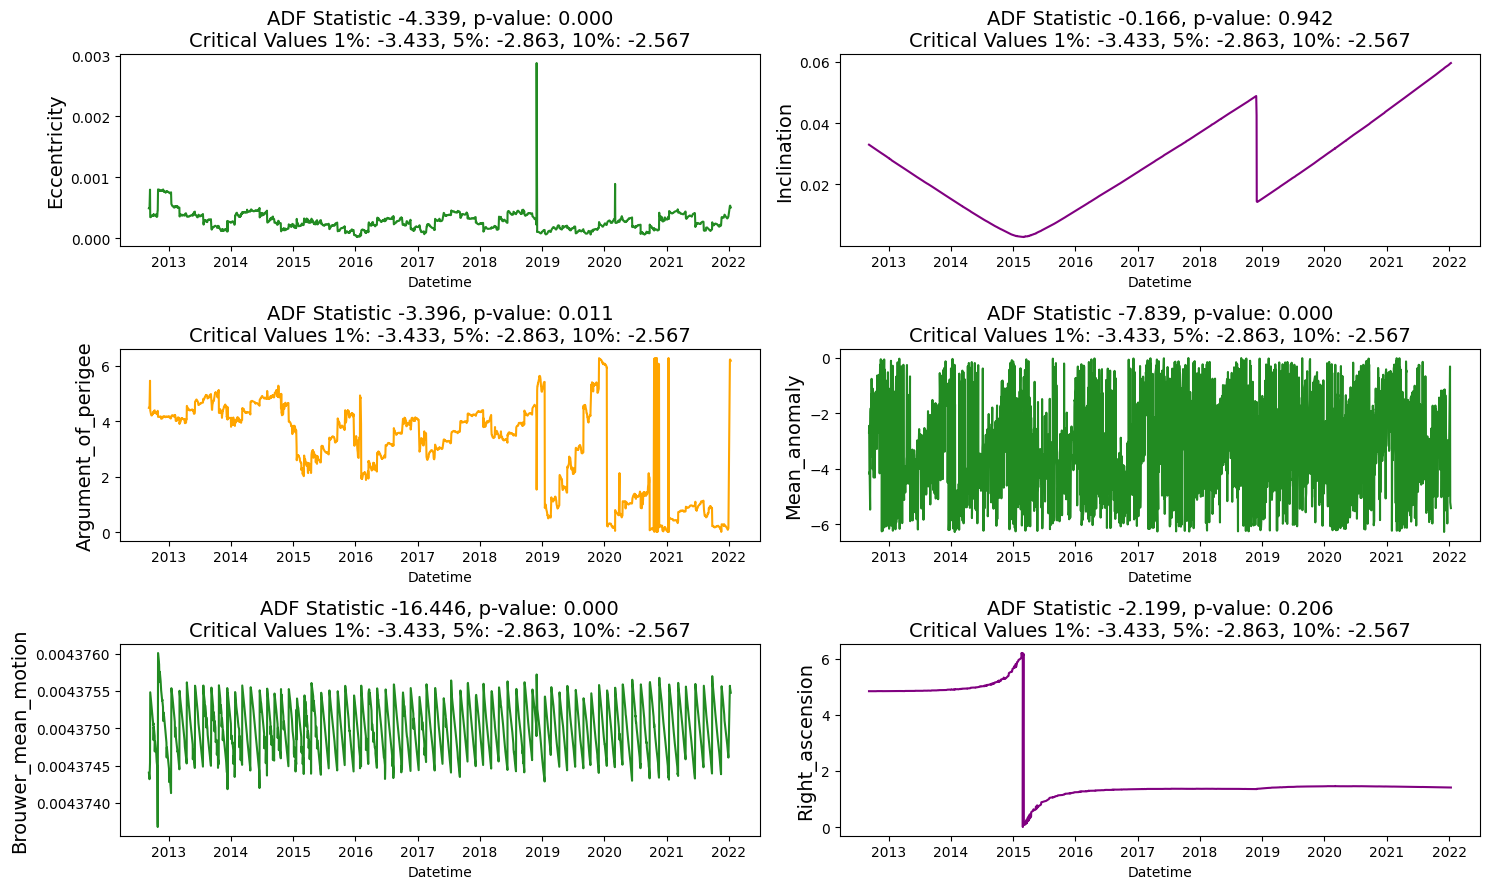

In [489]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[:]['Brouwer_mean_motion'].values)

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df[:]['eccentricity'].values, 'Eccentricity', ax[0, 0])
visualize_adfuller_results(df[:]['argument_of_perigee'].values, 'Argument_of_perigee', ax[1, 0])
visualize_adfuller_results(df[:]['inclination'].values, 'Inclination', ax[0, 1])
visualize_adfuller_results(df[:]['mean_anomaly'].values, 'Mean_anomaly', ax[1, 1])
visualize_adfuller_results(df[:]['Brouwer_mean_motion'].values, 'Brouwer_mean_motion', ax[2, 0])
visualize_adfuller_results(df[:]['right_ascension'].values, 'Right_ascension', ax[2, 1])


plt.tight_layout()
plt.show()


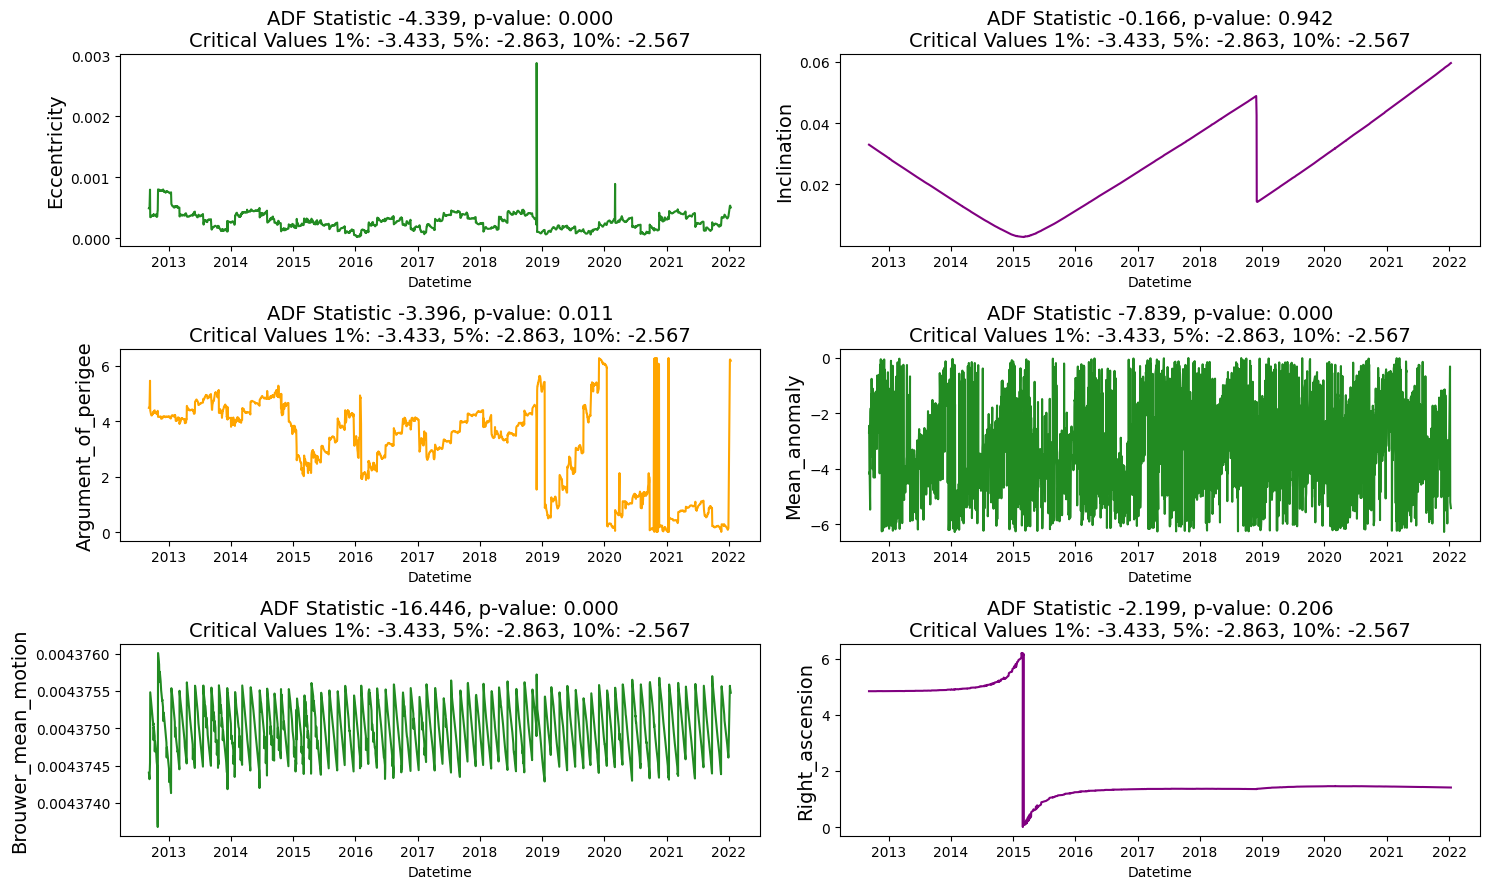

In [490]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[:]['Brouwer_mean_motion'].values)

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df[:]['eccentricity'].values, 'Eccentricity', ax[0, 0])
visualize_adfuller_results(df[:]['argument_of_perigee'].values, 'Argument_of_perigee', ax[1, 0])
visualize_adfuller_results(df[:]['inclination'].values, 'Inclination', ax[0, 1])
visualize_adfuller_results(df[:]['mean_anomaly'].values, 'Mean_anomaly', ax[1, 1])
visualize_adfuller_results(df[:]['Brouwer_mean_motion'].values, 'Brouwer_mean_motion', ax[2, 0])
visualize_adfuller_results(df[:]['right_ascension'].values, 'Right_ascension', ax[2, 1])


plt.tight_layout()
plt.show()


## **Log Tranformation**

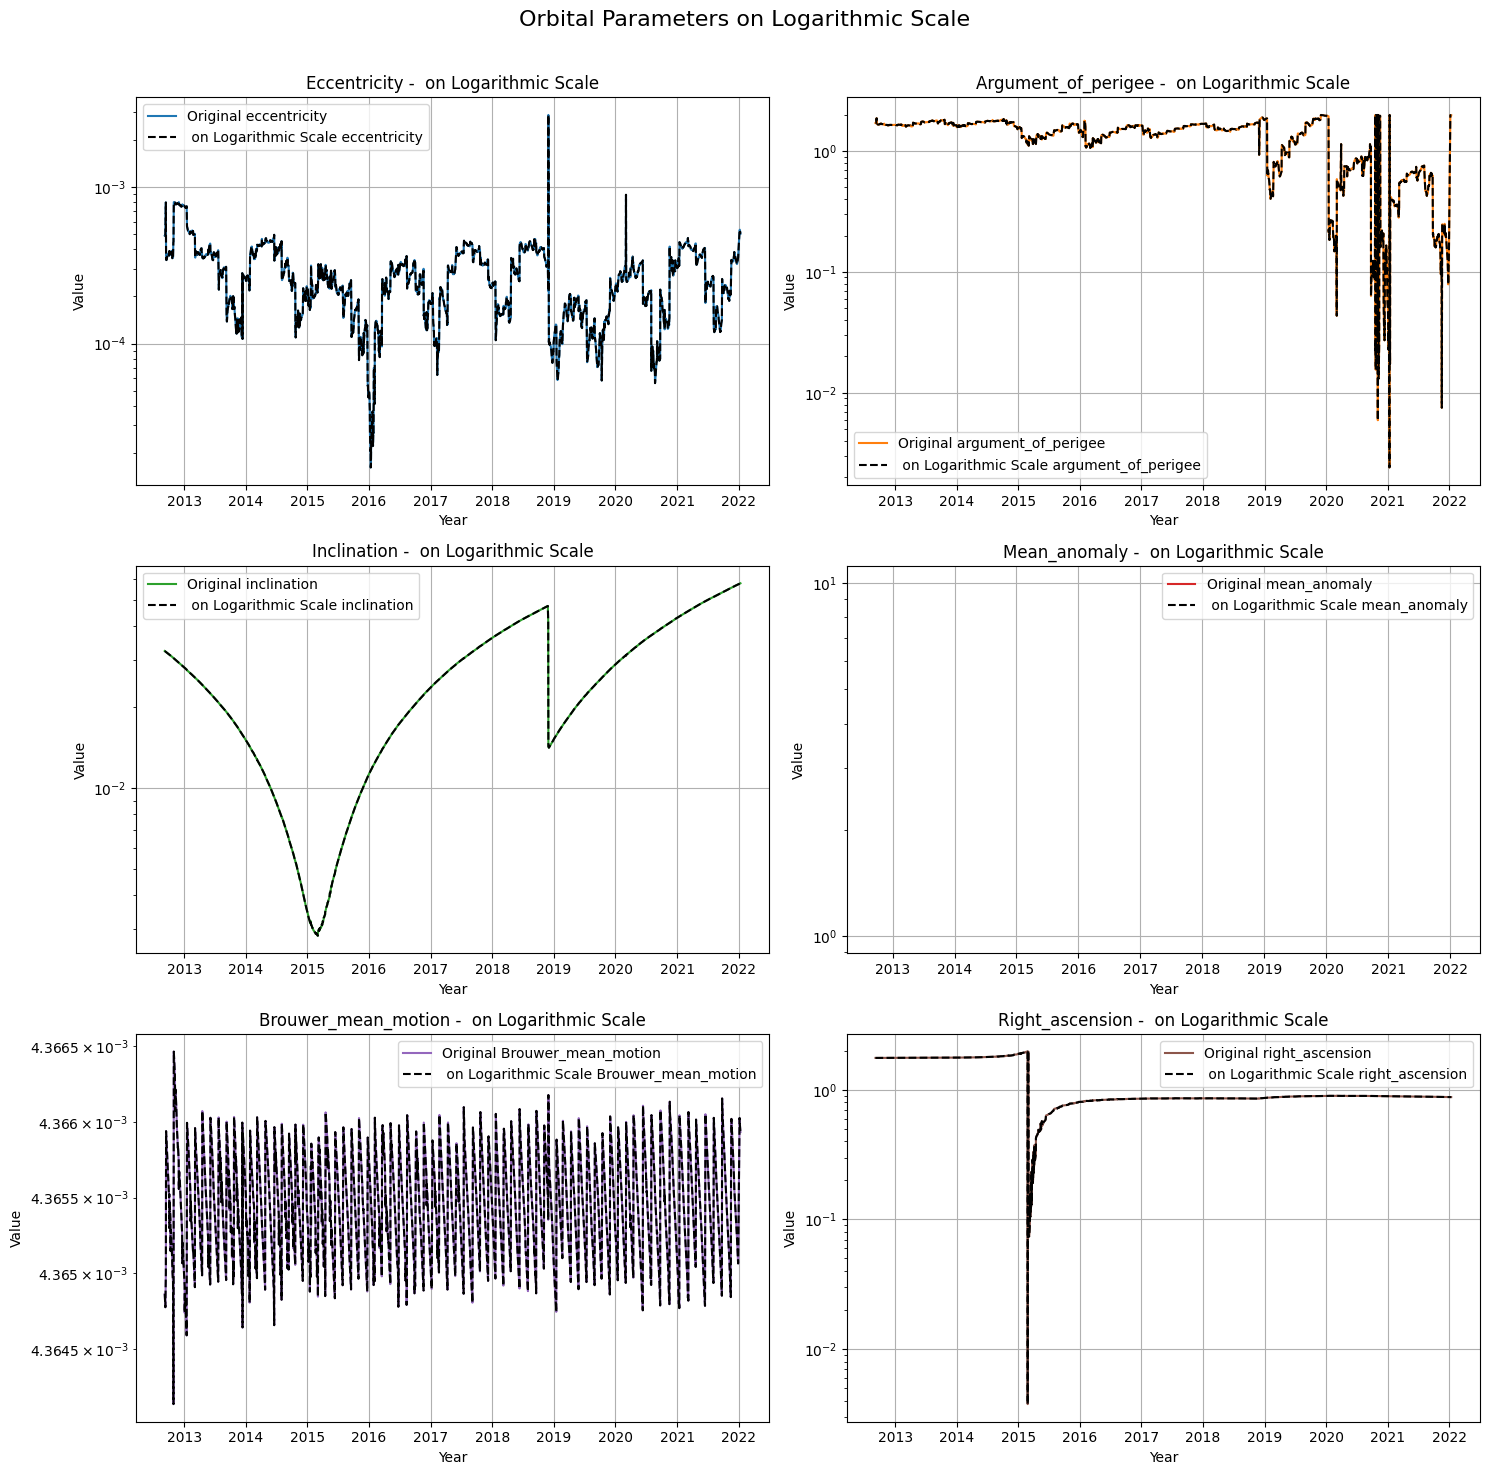

In [491]:

# Define available parameters from the dataset
df_log  = df.copy()
df_log = np.log(df_log +1)

parameters = [
    "eccentricity", "argument_of_perigee", "inclination", 
    "mean_anomaly", "Brouwer_mean_motion", "right_ascension"
]

# Define colors for each parameter
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b"
]

# Rolling window size
rolling_window = 5  

# Compute rolling mean & standard deviation
data_log = {
    col: {
        "log": df_log[col],
    }
    for col in parameters
}

# Create subplots (3 rows, 2 columns) since we have 6 parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Orbital Parameters on Logarithmic Scale", fontsize=16)

# Loop through each parameter and plot it
for i, param in enumerate(parameters):
    row, col = divmod(i, 2)  # Convert index to subplot row/column
    
    axes[row, col].plot(df_log.index, df_log[param], color=colors[i], label=f"Original {param}")
    axes[row, col].plot(df_log.index, data_log[param]["log"], color="black", linestyle="dashed", label=f" on Logarithmic Scale {param}")
    #axes[row, col].plot(df_log.index, rolling_data_log[param]["std"], color="gray", linestyle="dotted", label=f"Rolling Std Dev {param}")
    
    axes[row, col].set_title(f"{param.capitalize()} -  on Logarithmic Scale")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Value")
    axes[row, col].legend(loc="best")
    axes[row, col].grid(True)
    axes[row, col].set_yscale('log')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [492]:
df_log

,eccentricity,argument_of_perigee,inclination,mean_anomaly,Brouwer_mean_motion,right_ascension
Datetime,,,,,,
2012-09-06 18:48:32.050655,0.000488,1.701819,0.032409,NaN,0.004365,1.765097
2012-09-07 19:39:45.383327,0.000487,1.701327,0.032372,NaN,0.004365,1.765113
2012-09-08 15:43:39.075167,0.000487,1.700215,0.032339,NaN,0.004365,1.765130
2012-09-09 12:53:36.595967,0.000492,1.701299,0.032307,NaN,0.004365,1.765108
2012-09-10 13:15:22.135391,0.000495,1.707099,0.032272,NaN,0.004365,1.765117
...,...,...,...,...,...,...
2021-12-25 04:39:15.108767,0.000330,0.078944,0.057125,NaN,0.004365,0.880964
2021-12-28 21:00:18.080928,0.000355,0.131605,0.057232,NaN,0.004365,0.880645
2022-01-06 13:25:24.541247,0.000527,1.975629,0.057655,-0.3674,0.004366,0.880384


### First-Order Differencing  
Subtract the previous observation from the current one:  

\[
Y_t' = Y_t - Y_{t-1}
\]


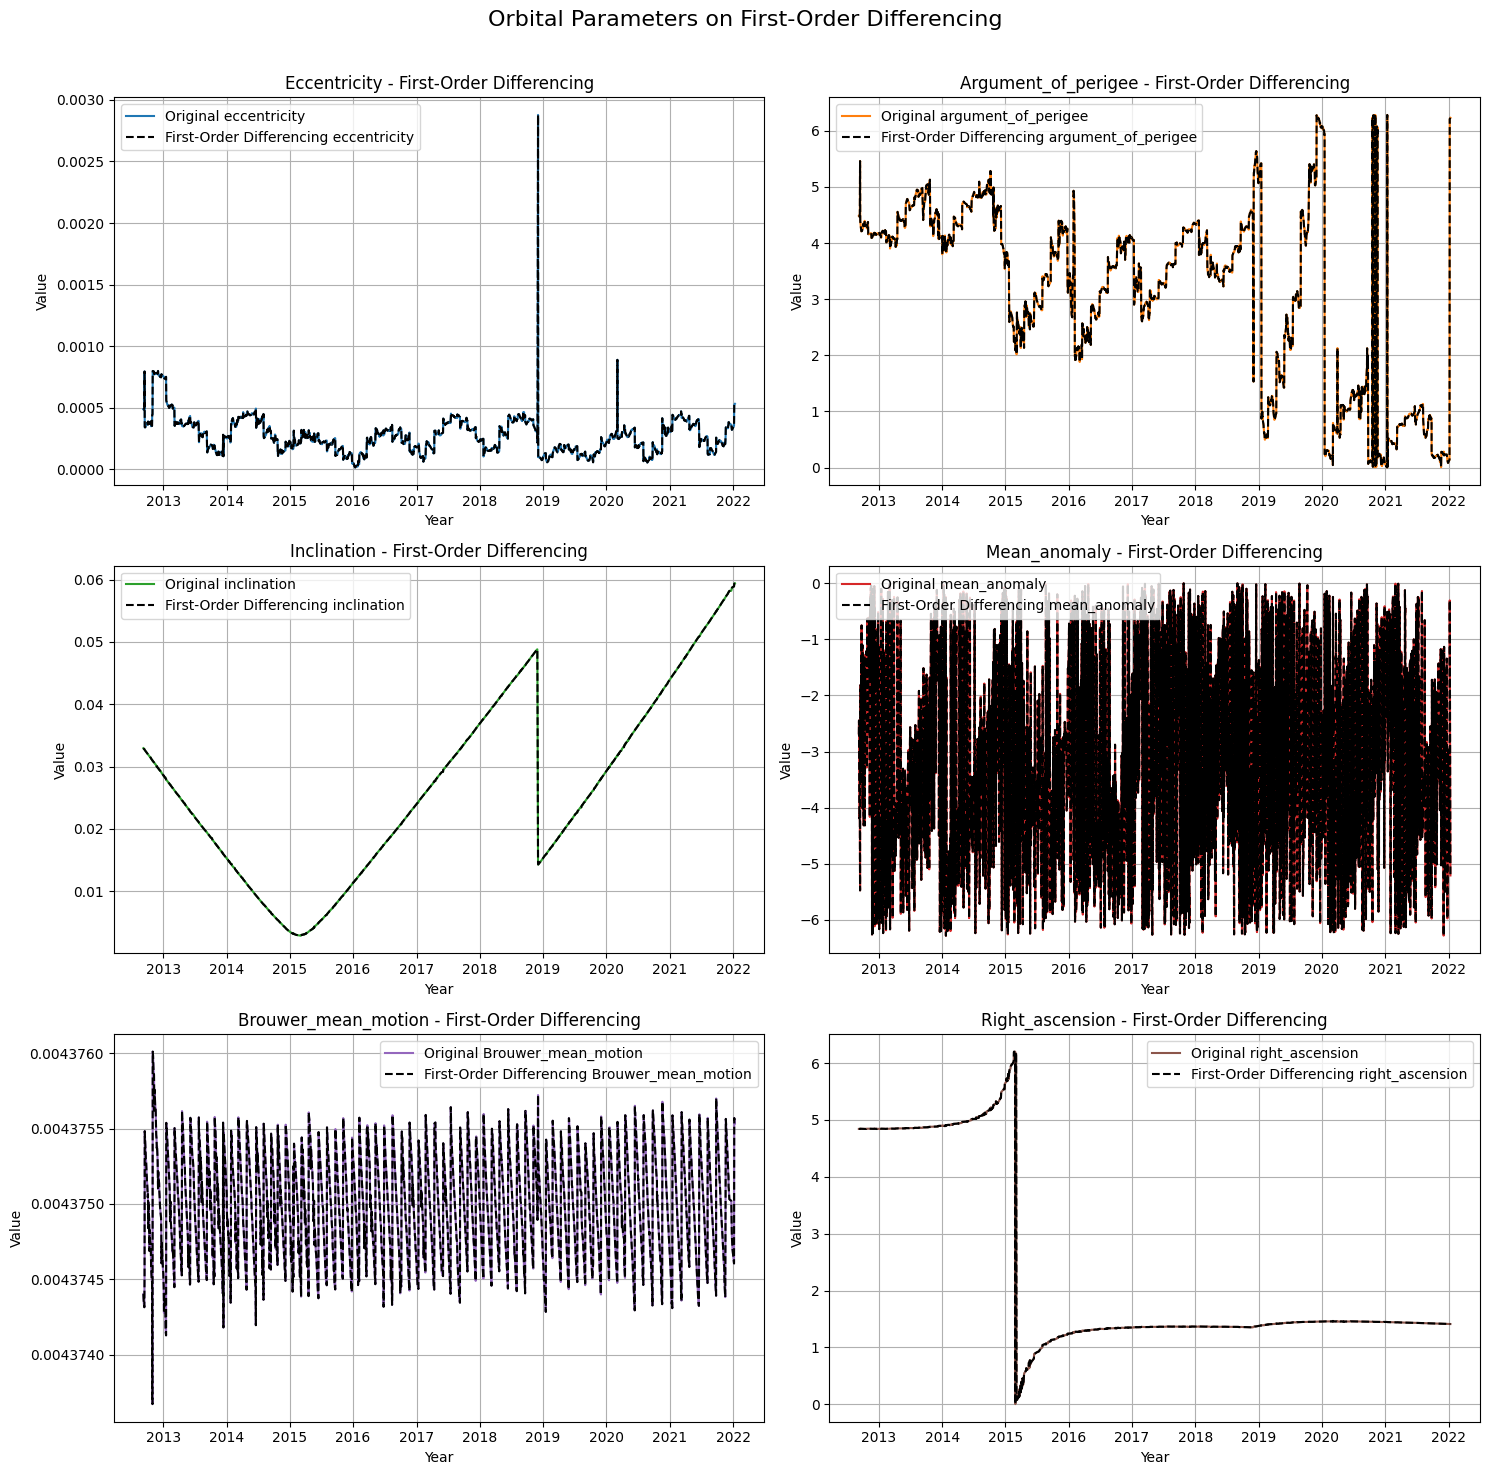

In [493]:
df_shift = df.copy()
df_shift = df_shift.shift(1)

parameters = [
    "eccentricity", "argument_of_perigee", "inclination", 
    "mean_anomaly", "Brouwer_mean_motion", "right_ascension"
]

# Define colors for each parameter
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b"
]

# Rolling window size
rolling_window = 5  

# Compute rolling mean & standard deviation
data_shift = {
    col: {
        "first order": df_shift[col]
    }
    for col in parameters
}

# Create subplots (3 rows, 2 columns) since we have 6 parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Orbital Parameters on First-Order Differencing", fontsize=16)

# Loop through each parameter and plot it
for i, param in enumerate(parameters):
    row, col = divmod(i, 2)  # Convert index to subplot row/column
    
    axes[row, col].plot(df_shift.index, df_shift[param], color=colors[i], label=f"Original {param}")
    axes[row, col].plot(df_shift.index, data_shift[param]["first order"], color="black", linestyle="dashed", label=f"First-Order Differencing {param}")
    #axes[row, col].plot(df_shift.index, rolling_data_shift[param]["std"], color="gray", linestyle="dotted", label=f"Rolling Std Dev {param}")
    
    axes[row, col].set_title(f"{param.capitalize()} - First-Order Differencing")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Value")
    axes[row, col].legend(loc="best")
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Boxcox and Yeojohnson Transformation

In [494]:
from scipy.stats import boxcox, yeojohnson
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Apply Box-Cox transformation (only for positive values)
boxcox_transformed = {}
for col in numerical_cols:
    if (df[col] > 0).all():  # Box-Cox requires strictly positive values
        boxcox_transformed[col], _ = boxcox(df[col])
    else:
        print(f"Skipping Box-Cox for {col} (contains non-positive values)")

# Apply Yeo-Johnson transformation (works for both positive & negative values)
yeojohnson_transformed = {}
for col in numerical_cols:
    yeojohnson_transformed[col], _ = yeojohnson(df[col])

# Convert transformed data back to DataFrame
df_boxcox = pd.DataFrame(boxcox_transformed)
df_yeojohnson = pd.DataFrame(yeojohnson_transformed)
if 'mean_anomaly' in df.columns:
    df_boxcox['mean_anomaly'] = df['mean_anomaly']
    df_yeojohnson['mean_anomaly'] = df['mean_anomaly']
# Display the transformed data
print("Box-Cox Transformed Data:\n", df_boxcox.head())
print("Yeo-Johnson Transformed Data:\n", df_yeojohnson.head())

Skipping Box-Cox for mean_anomaly (contains non-positive values)
Box-Cox Transformed Data:
    eccentricity  argument_of_perigee  inclination  Brouwer_mean_motion  \
0     -2.629296             3.372852    -1.354793            -0.002962   
1     -2.629460             3.370293    -1.354916            -0.002962   
2     -2.629487             3.364510    -1.355021            -0.002962   
3     -2.628804             3.370149    -1.355127            -0.002962   
4     -2.628383             3.400399    -1.355244            -0.002962   

   right_ascension  mean_anomaly  
0         1.556583           NaN  
1         1.556602           NaN  
2         1.556622           NaN  
3         1.556596           NaN  
4         1.556607           NaN  
Yeo-Johnson Transformed Data:
    eccentricity  argument_of_perigee  inclination  mean_anomaly  \
0      0.000298             6.154941     0.029262           NaN   
1      0.000298             6.150560     0.029231           NaN   
2      0.000297      

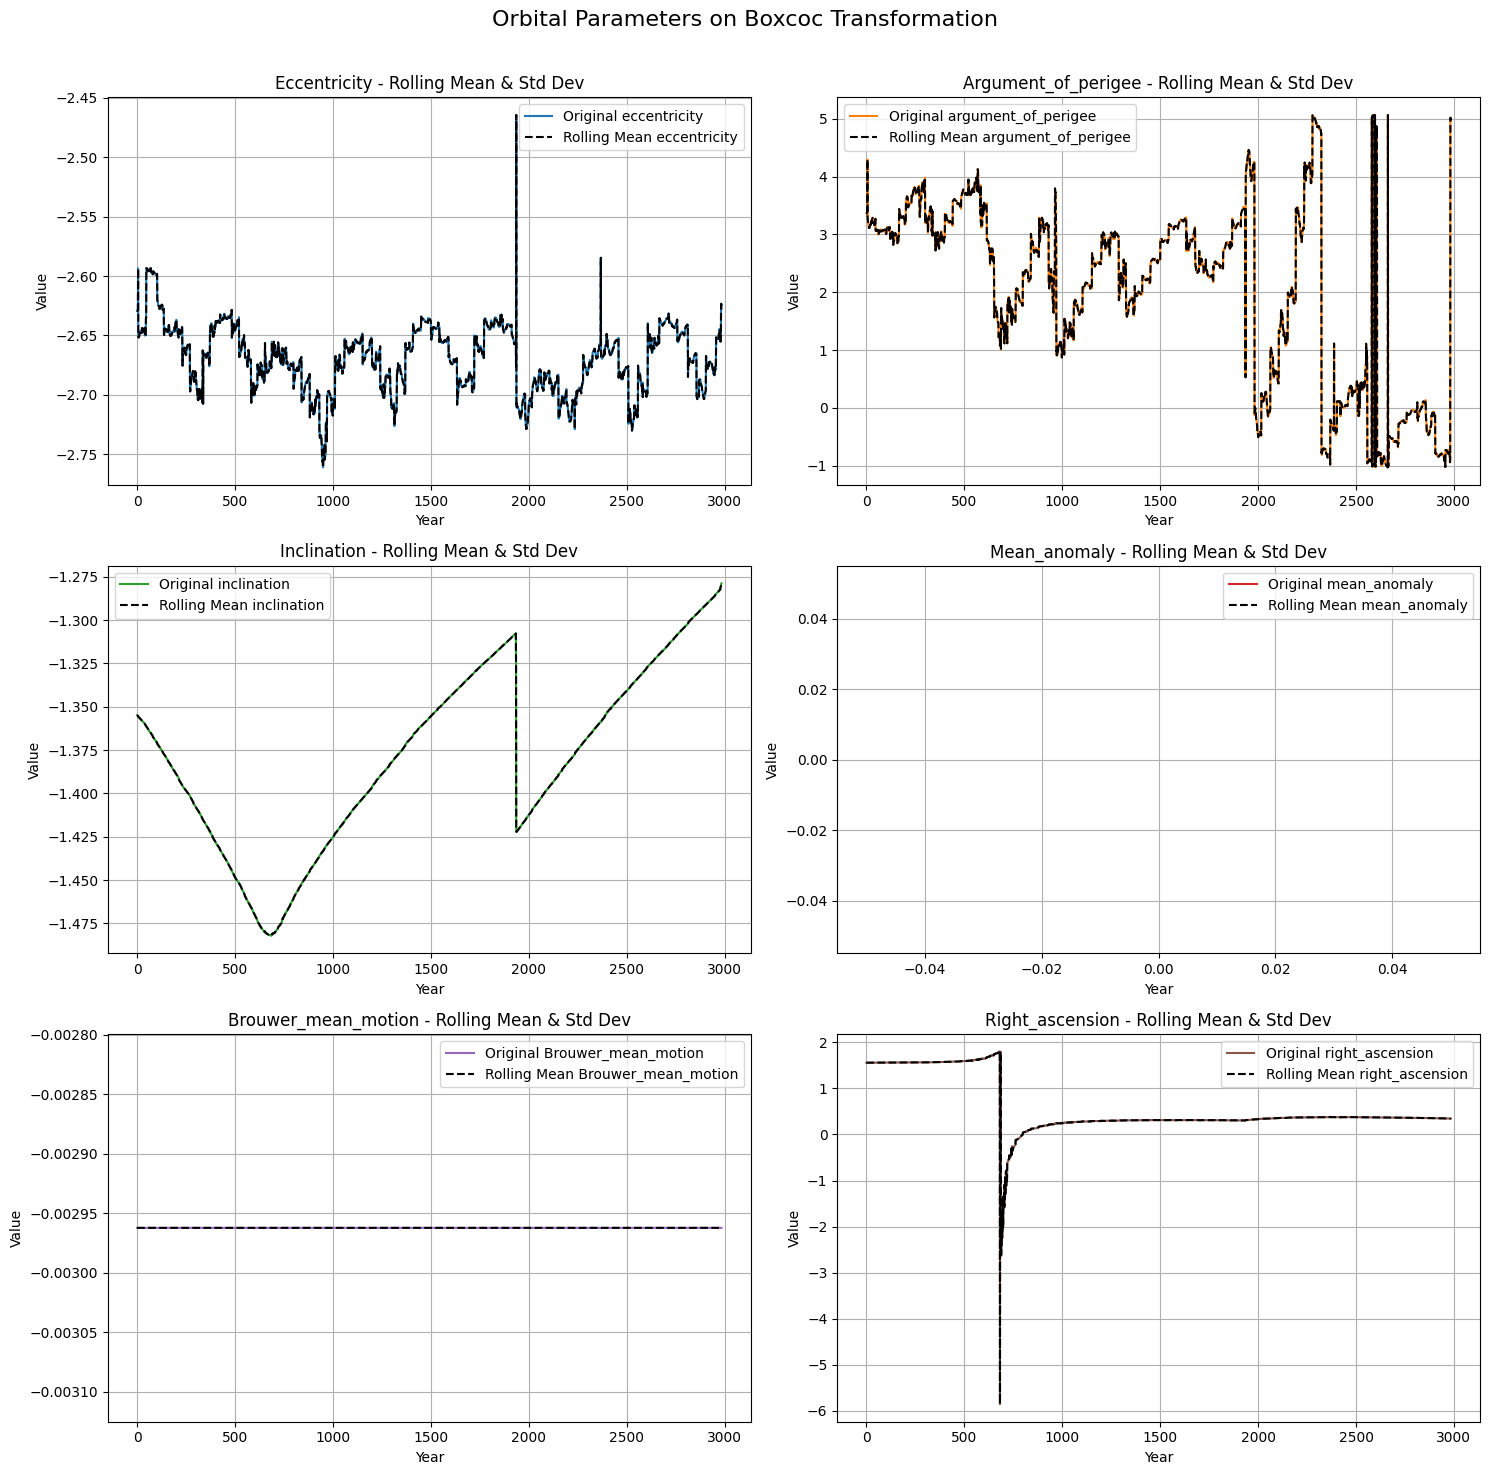

In [495]:
parameters = [
    "eccentricity", "argument_of_perigee", "inclination", 
    "mean_anomaly", "Brouwer_mean_motion", "right_ascension"
]

# Define colors for each parameter
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b"
]

# Rolling window size
rolling_window = 5  

# Compute rolling mean & standard deviation
data_boxcox = {
    col: {
        "boxcox": df_boxcox[col]
    }
    for col in parameters
}

# Create subplots (3 rows, 2 columns) since we have 6 parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Orbital Parameters on Boxcoc Transformation", fontsize=16)

# Loop through each parameter and plot it
for i, param in enumerate(parameters):
    row, col = divmod(i, 2)  # Convert index to subplot row/column
    
    axes[row, col].plot(df_boxcox.index, df_boxcox[param], color=colors[i], label=f"Original {param}")
    axes[row, col].plot(df_boxcox.index, data_boxcox[param]["boxcox"], color="black", linestyle="dashed", label=f"Rolling Mean {param}")
    
    axes[row, col].set_title(f"{param.capitalize()} - Rolling Mean & Std Dev")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Value")
    axes[row, col].legend(loc="best")
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

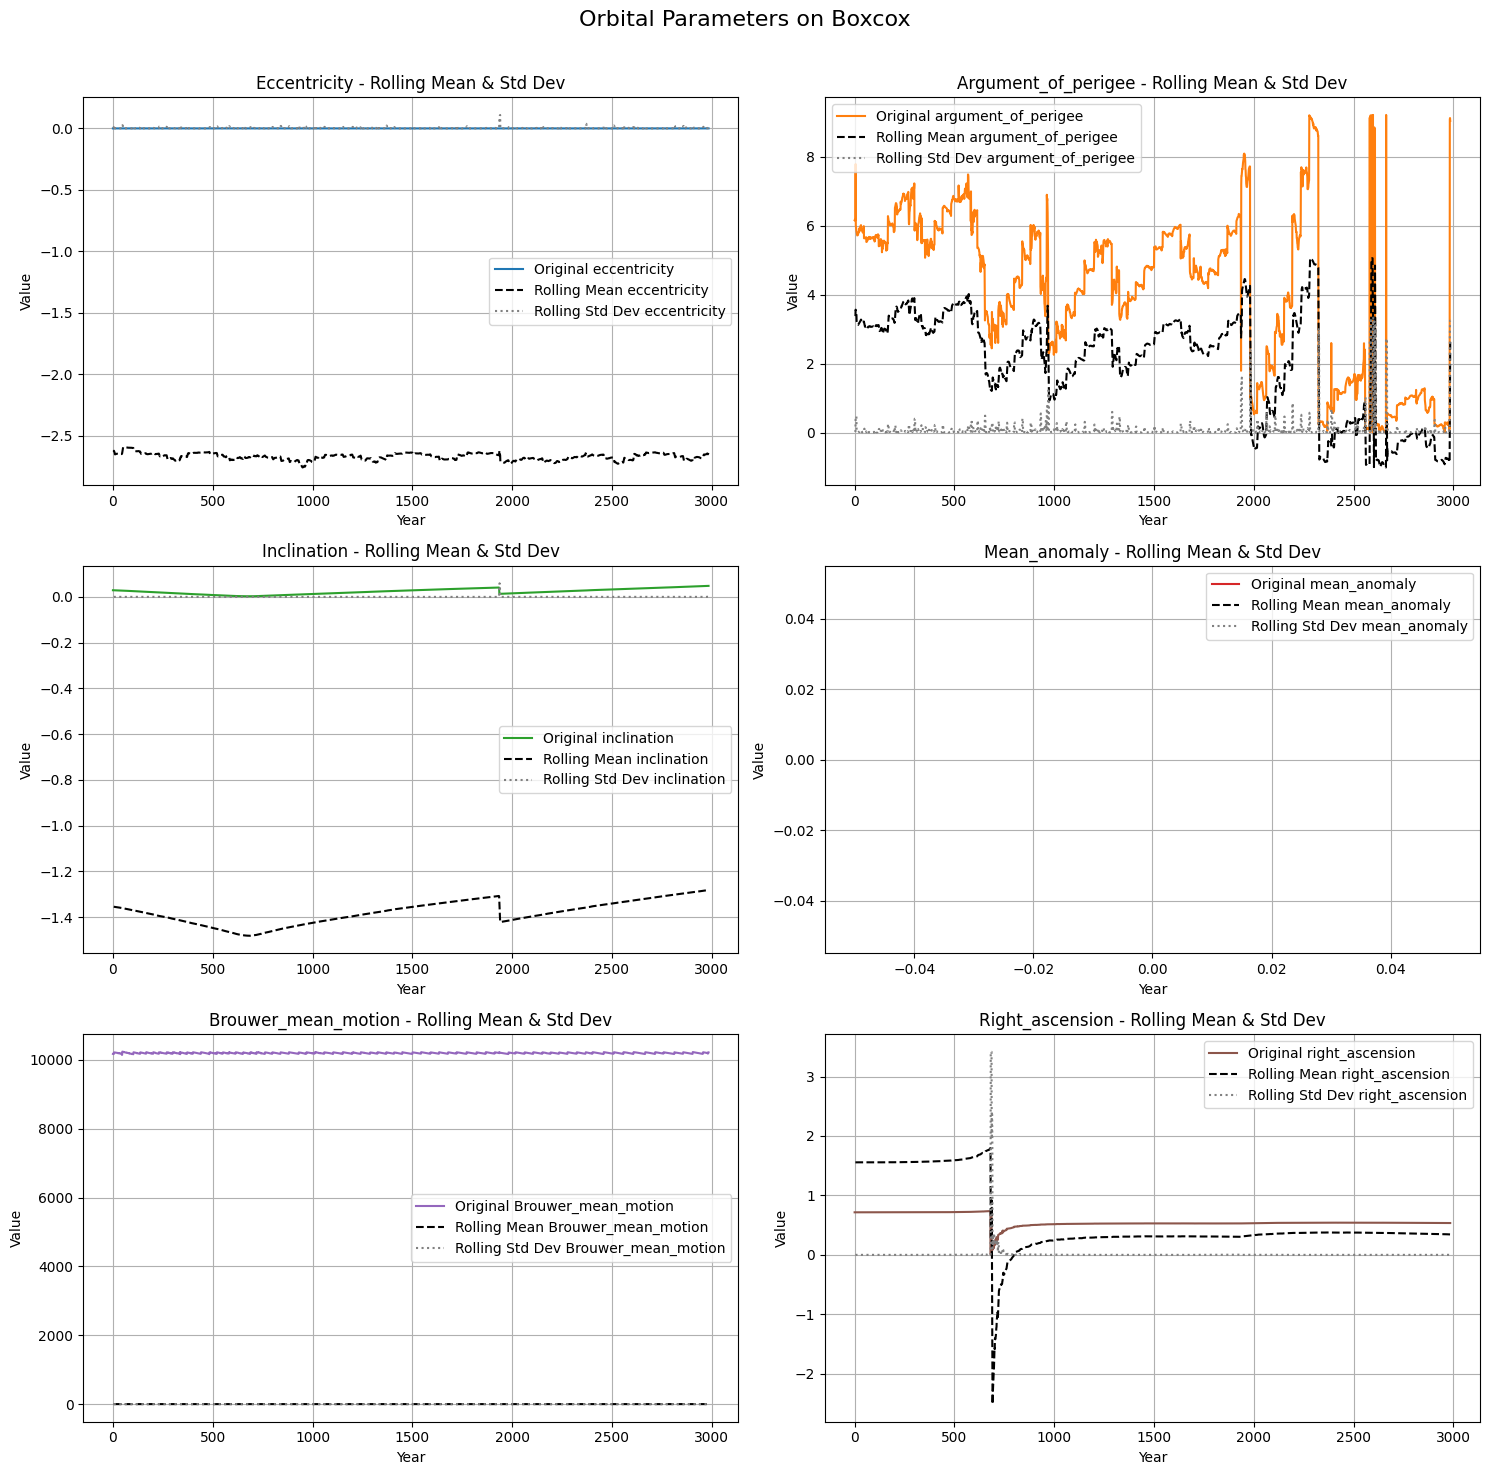

In [496]:
parameters = [
    "eccentricity", "argument_of_perigee", "inclination", 
    "mean_anomaly", "Brouwer_mean_motion", "right_ascension"
]

# Define colors for each parameter
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b"
]

# Rolling window size
rolling_window = 5  

# Compute rolling mean & standard deviation
rolling_data_shift = {
    col: {
        "mean": df_boxcox[col].rolling(rolling_window).mean(),
        "std": df_boxcox[col].rolling(rolling_window).std()
    }
    for col in parameters
}

# Create subplots (3 rows, 2 columns) since we have 6 parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Orbital Parameters on Boxcox", fontsize=16)

# Loop through each parameter and plot it
for i, param in enumerate(parameters):
    row, col = divmod(i, 2)  # Convert index to subplot row/column
    
    axes[row, col].plot(df_yeojohnson.index, df_yeojohnson[param], color=colors[i], label=f"Original {param}")
    axes[row, col].plot(df_yeojohnson.index, rolling_data_shift[param]["mean"], color="black", linestyle="dashed", label=f"Rolling Mean {param}")
    axes[row, col].plot(df_yeojohnson.index, rolling_data_shift[param]["std"], color="gray", linestyle="dotted", label=f"Rolling Std Dev {param}")
    
    axes[row, col].set_title(f"{param.capitalize()} - Rolling Mean & Std Dev")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Value")
    axes[row, col].legend(loc="best")
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [497]:
# Choose a seasonal lag (e.g., 12 for yearly seasonality in monthly data)
seasonal_lag = 1  

# Apply seasonal differencing to all numeric columns
df_diff = df.copy()
numeric_cols = df.select_dtypes(include=['number']).columns
df_diff[numeric_cols] = df[numeric_cols].diff(seasonal_lag)

# Display the first few rows
print(df_diff.head())

                            eccentricity  argument_of_perigee  inclination  \
Datetime                                                                     
2012-09-06 18:48:32.050655           NaN                  NaN          NaN   
2012-09-07 19:39:45.383327 -1.200000e-06            -0.002697    -0.000038   
2012-09-08 15:43:39.075167 -2.000000e-07            -0.006093    -0.000033   
2012-09-09 12:53:36.595967  5.000000e-06             0.005941    -0.000033   
2012-09-10 13:15:22.135391  3.100000e-06             0.031880    -0.000037   

                            mean_anomaly  Brouwer_mean_motion  right_ascension  
Datetime                                                                        
2012-09-06 18:48:32.050655           NaN                  NaN              NaN  
2012-09-07 19:39:45.383327      0.243002        -2.351689e-08         0.000096  
2012-09-08 15:43:39.075167     -1.010600        -1.945927e-08         0.000098  
2012-09-09 12:53:36.595967     -0.733457        

### Train Test split

In [498]:
#Train Val Test split
# Define split ratios
train_ratio = 0.8
val_ratio = 0.2

# Sanity check (optional)
assert (train_ratio + val_ratio) == 1.0, "Ratios must sum to 1"

# Compute indices
total_len = len(df_shift)
train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)

row="eccentricity" #"eccentricity"

# Perform splits for arima
training_data = df_shift[:train_end][row]
validation_data = df_shift[train_end:val_end][row]

#Peform splits for Rolling arima

# Print details
print(f"Total Length: {total_len}")
print(f"Training Data: {len(training_data)} points")
print(f"Validation Data: {len(validation_data)} points")
#print(f"Testing Data: {len(testing_data)} points")
#print(type(testing_data))

Total Length: 2985
Training Data: 2388 points
Validation Data: 597 points


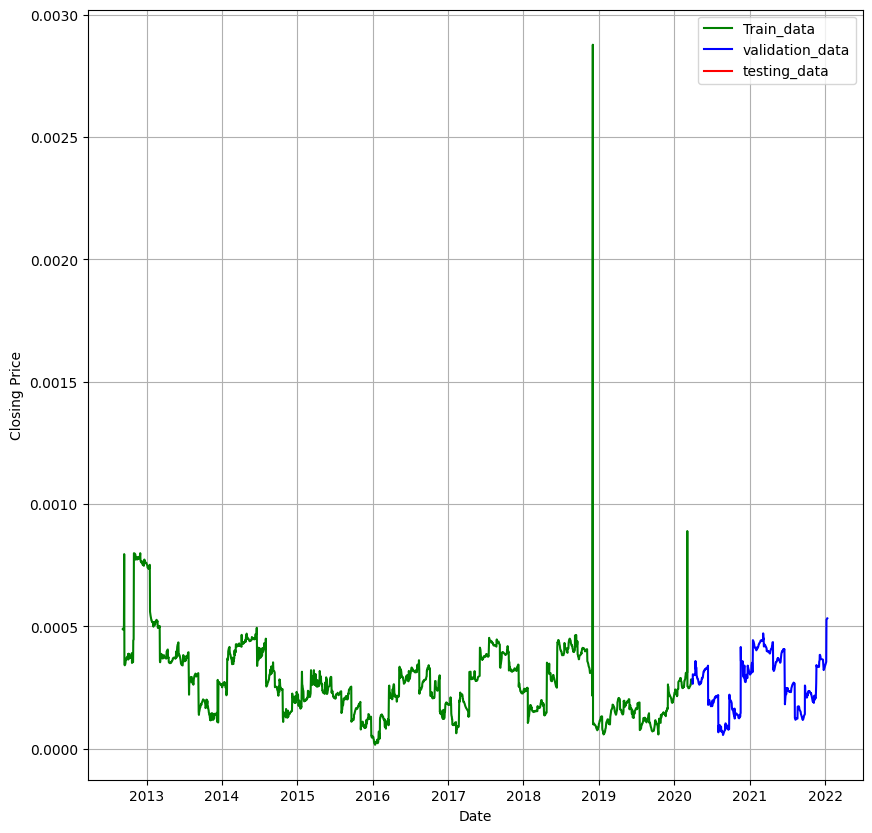

In [499]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df_shift[:train_end][row],'green',label='Train_data')
plt.plot(df_shift[train_end:val_end][row],'blue',label='validation_data')
plt.plot(df_shift[val_end:][row],'red',label='testing_data')
plt.legend()

### AUTO-ARIMA

In [508]:
!uv pip install "numpy<2"

Audited 1 package in 19ms


In [509]:
!uv pip list

Package                      Version
---------------------------- -----------------
absl-py                      2.3.1
annotated-types              0.7.0
asttokens                    3.0.0
astunparse                   1.6.3
attrs                        25.3.0
cachetools                   5.5.2
certifi                      2025.7.14
charset-normalizer           3.4.2
click                        8.2.1
cmdstanpy                    1.2.5
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
cython                       3.1.2
dacite                       1.9.2
debugpy                      1.8.15
decorator                    5.2.1
exceptiongroup               1.3.0
executing                    2.2.0
flatbuffers                  25.2.10
fonttools                    4.59.0
gast                         0.4.0
google-auth                  2.40.3
google-auth-oauthlib         1.0.0
google-pasta                 0

In [510]:
import os
!uv pip install numpy==1.26.4 --quiet
!uv pip install pmdarima --quiet 
# Reiniciamos la sesion de google colab 

In [511]:
training_data = training_data.dropna()

In [512]:
from pmdarima.arima import auto_arima
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_data = list(training_data)  # Convert to list to allow dynamic updates
valid_data = list(validation_data)


# # Fit the optimal ARIMA model
# model_auto_arima = auto_arima(train_data, seasonal=True, stepwise=True, suppress_warnings=True)
# predictions = []
# print(model_auto_arima)

# for val in valid_data:
#     pred = model_auto_arima.predict(n_periods=1)[0]
#     predictions.append(pred)
#     model_auto_arima.update(val)

In [513]:
# print(model_auto_arima.summary())print(model_auto_arima.summary())

In [514]:
# plt.figure(figsize=(15,9))
# plt.grid(True)

# date_range=df_shift[train_end:val_end][row].index

# #print(date_range)
# #print(model_predictions)

# plt.plot(date_range, predictions[:], color='blue', linestyle='-', label="SATELLITE ECCENTRICITY PREDICTION")
# plt.plot(date_range, validation_data, color='red', linestyle='dashed', label="SATELLITE ECCENTRICITY")

# plt.title("SATELLITE ECCENTRICITY PREDICTION")
# plt.xlabel("DATE")
# plt.ylabel("ECCENTRICITY")
# plt.legend()
# plt.show()

 ARIMA(0,1,3)(0,0,0)[0] intercept
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2984
Model:               SARIMAX(0, 1, 3)   Log Likelihood               24656.737
Date:                Mon, 28 Jul 2025   AIC                         -49303.474
Time:                        20:43:25   BIC                         -49273.470
Sample:                             0   HQIC                        -49292.679
                               - 2984                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.702e-07   5.31e-07     -1.262      0.207   -1.71e-06    3.71e-07
ma.L1         -0.7369   8.28e-11   -8.9e+09      0.000      -0.737      -0.737
ma.L2          0.0

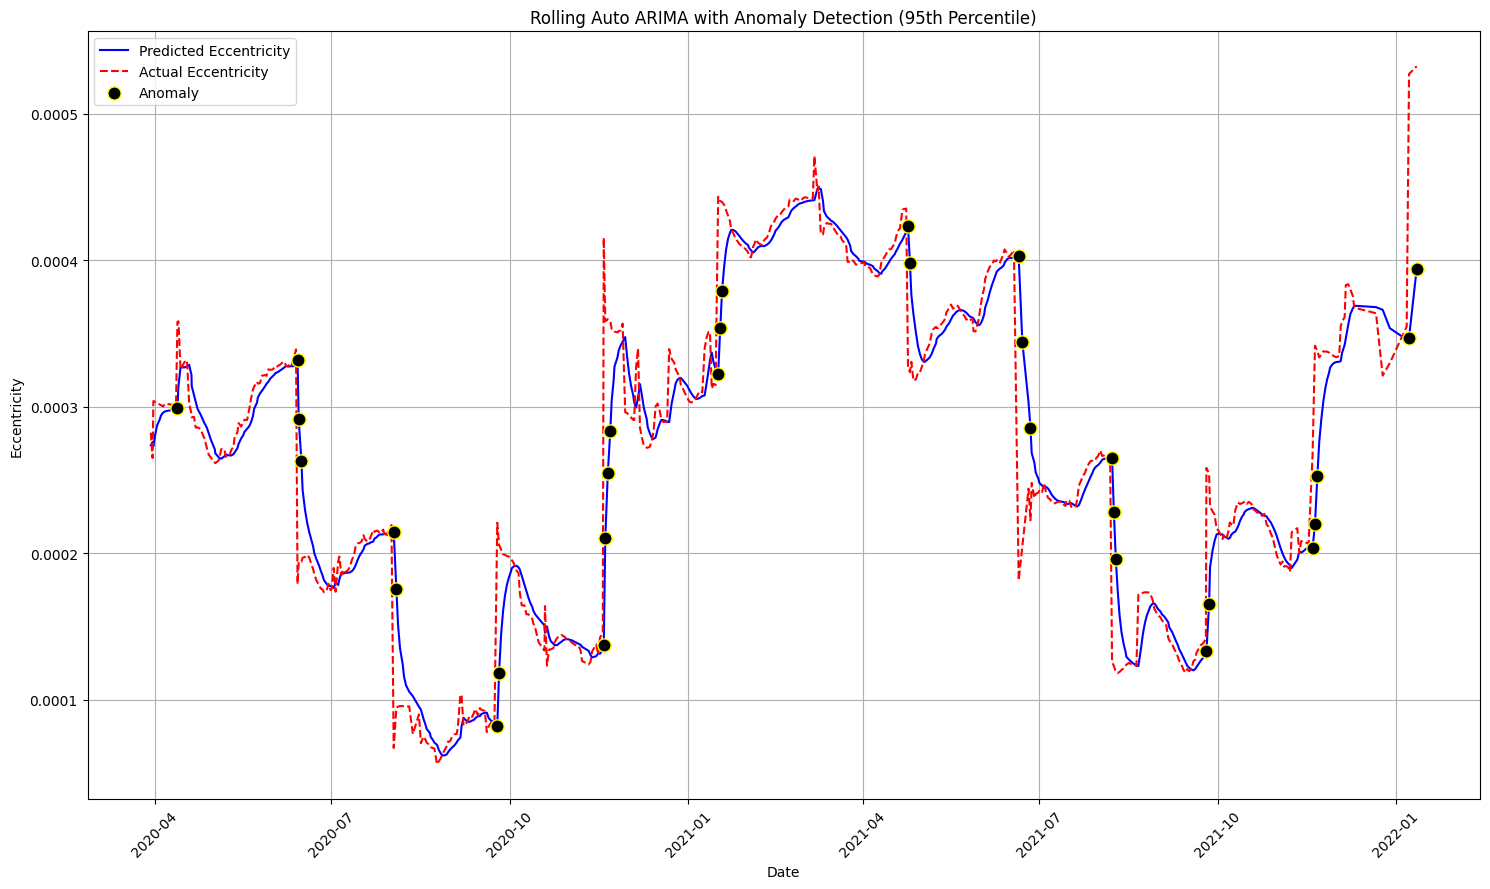

95th Percentile Anomaly Threshold: 5.887134360759488e-05


In [515]:
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Rolling Auto ARIMA setup
train_data = list(training_data)  # Convert to list to allow dynamic updates
valid_data = list(validation_data)

# Fit optimal ARIMA model
model_auto_arima = auto_arima(train_data, seasonal=True, stepwise=True, suppress_warnings=True)
print(model_auto_arima)

# Rolling prediction
predictions = []
for val in valid_data:
    pred = model_auto_arima.predict(n_periods=1)[0]
    predictions.append(pred)
    model_auto_arima.update(val)

print(model_auto_arima.summary())

# Convert to numpy arrays for residual calculations
predictions = np.array(predictions)
validation_data = np.array(validation_data)

# Step 1: Compute residuals (absolute errors)
residuals = np.abs(validation_data - predictions)

# Step 2: Determine dynamic anomaly threshold (e.g., top 5% residuals)
threshold = np.percentile(residuals, 95)

# Step 3: Generate anomaly labels
anomaly_labels = residuals > threshold

# Step 4: Prepare date range
date_range = df_shift[train_end:val_end][row].index

# Step 5: Plot actual vs predicted with anomalies
plt.figure(figsize=(15, 9))
plt.grid(True)

# Plot predicted and actual lines
plt.plot(date_range, predictions, color='blue', linestyle='-', label="Predicted Eccentricity")
plt.plot(date_range, validation_data, color='red', linestyle='dashed', label="Actual Eccentricity")

# Plot anomalies
anomaly_dates = np.array(date_range)[anomaly_labels]
anomaly_values = np.array(predictions)[anomaly_labels]

plt.scatter(anomaly_dates, anomaly_values, color='black', edgecolors='yellow', label='Anomaly', s=90, zorder=5)

# Decorations
plt.title("Rolling Auto ARIMA with Anomaly Detection (95th Percentile)")
plt.xlabel("Date")
plt.ylabel("Eccentricity")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("95th Percentile Anomaly Threshold:", threshold)

### LSTM

In [531]:
#Train Val Test split
# Define split ratios
train_ratio = 0.5
val_ratio = 0.1
test_ratio = 0.4

row="eccentricity"
# Sanity check (optional)
assert (train_ratio + val_ratio + test_ratio) == 1.0, "Ratios must sum to 1"

# Compute indices
total_len = len(df_shift)
train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)


training_data = df_shift[1:train_end][[row]]
validation_data = df_shift[train_end:val_end][[row]]
testing_data = df_shift[val_end:][[row]]
training_data.reset_index(inplace=True)
validation_data.reset_index(inplace=True)
testing_data.reset_index(inplace=True)
print(training_data)

                       Datetime  eccentricity
0    2012-09-07 19:39:45.383327      0.000488
1    2012-09-08 15:43:39.075167      0.000487
2    2012-09-09 12:53:36.595967      0.000487
3    2012-09-10 13:15:22.135391      0.000492
4    2012-09-13 11:30:17.116991      0.000495
...                         ...           ...
1486 2017-08-23 19:17:14.807904      0.000430
1487 2017-08-24 14:46:38.772191      0.000447
1488 2017-08-25 05:27:20.842848      0.000435
1489 2017-08-26 05:17:45.724704      0.000434
1490 2017-08-27 12:44:42.465983      0.000433

[1491 rows x 2 columns]


In [532]:
def create_dataset(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30

#X_train, y_train = create_dataset(training_data["Datetime"].diff().dt.total_seconds(),training_data["mean_anomaly"], time_steps)
X_train, y_train = create_dataset(training_data["eccentricity"],training_data["eccentricity"], time_steps)
X_val, y_val = create_dataset(validation_data["eccentricity"], validation_data["eccentricity"], time_steps)
X_test, y_test = create_dataset(testing_data["eccentricity"],testing_data["eccentricity"], time_steps)

print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
X_train = X_train.reshape((1461, 30, 1))
X_val=X_val.reshape(268,30,1)
X_test=X_test.reshape(1165,30,1)
#print(len(X_train[1]), len(y_train))
#print(X_train.shape, y_train.shape)

(268, 30) (268,)
(1165, 30) (1165,)


In [533]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [534]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))                 
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_5 (RepeatVec  (None, 30, 128)           0         
 tor)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 30, 128)           131584    
                                                                 
 dropout_11 (Dropout)        (None, 30, 128)           0         
                                                                 
 time_distributed_5 (TimeDi  (None, 30, 1)             129       
 stributed)                                           

In [535]:
#es = tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=5)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    shuffle=False
)

Epoch 1/100
46/46 [==============================] - 4s 40ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 2/100
46/46 [==============================] - 1s 29ms/step - loss: 5.9382e-04 - val_loss: 5.4070e-04
Epoch 3/100
46/46 [==============================] - 1s 32ms/step - loss: 5.0372e-04 - val_loss: 0.0013
Epoch 4/100
46/46 [==============================] - 1s 31ms/step - loss: 3.1173e-04 - val_loss: 3.6443e-04
Epoch 5/100
46/46 [==============================] - 1s 30ms/step - loss: 2.3411e-04 - val_loss: 1.0571e-04
Epoch 6/100
46/46 [==============================] - 1s 32ms/step - loss: 2.7432e-04 - val_loss: 4.1363e-04
Epoch 7/100
46/46 [==============================] - 1s 31ms/step - loss: 3.4289e-04 - val_loss: 9.7744e-04
Epoch 8/100
46/46 [==============================] - 1s 32ms/step - loss: 1.9999e-04 - val_loss: 1.5102e-04
Epoch 9/100
46/46 [==============================] - 1s 31ms/step - loss: 3.4819e-04 - val_loss: 1.1808e-04
Epoch 10/100
46/46 [====================

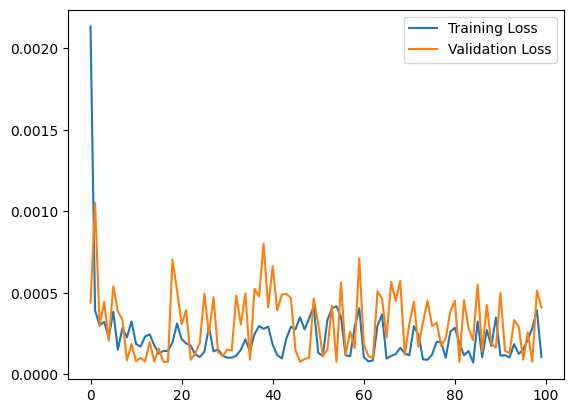

In [521]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [522]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 2s 45ms/step - loss: 4.3820e-04


0.0004382018814794719

In [523]:
X_train_pred = model.predict(X_train)
train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

46/46 [==============================] - 4s 53ms/step


In [524]:
train_mae_loss

,Error
0,0.000282
1,0.000286
2,0.000289
3,0.000293
4,0.000297
...,...
1456,0.000245
1457,0.000245
1458,0.000245
1459,0.000245


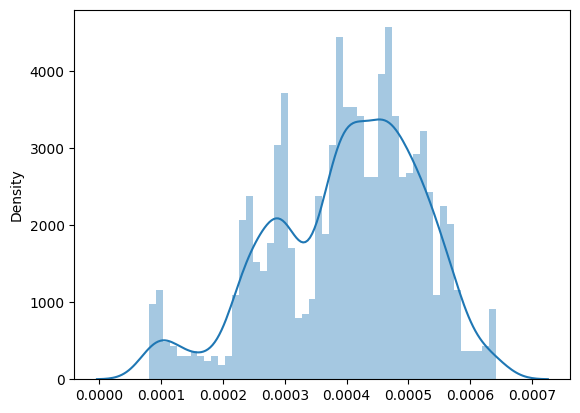

In [525]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [526]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

37/37 [==============================] - 2s 43ms/step


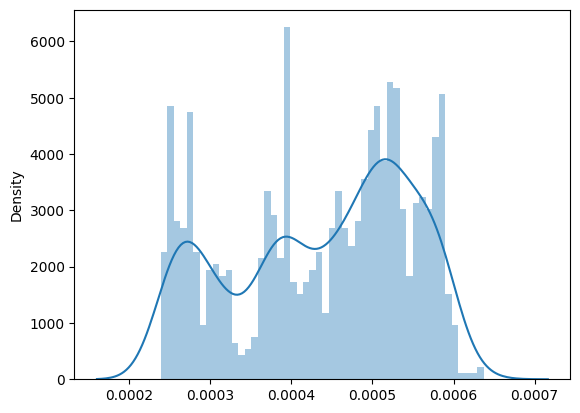

In [527]:
sns.distplot(test_mae_loss, bins=50, kde=True);

In [528]:
predict=[]
for i in X_test_pred:
    predict.append(np.average(i))
print(len(predict))

1165


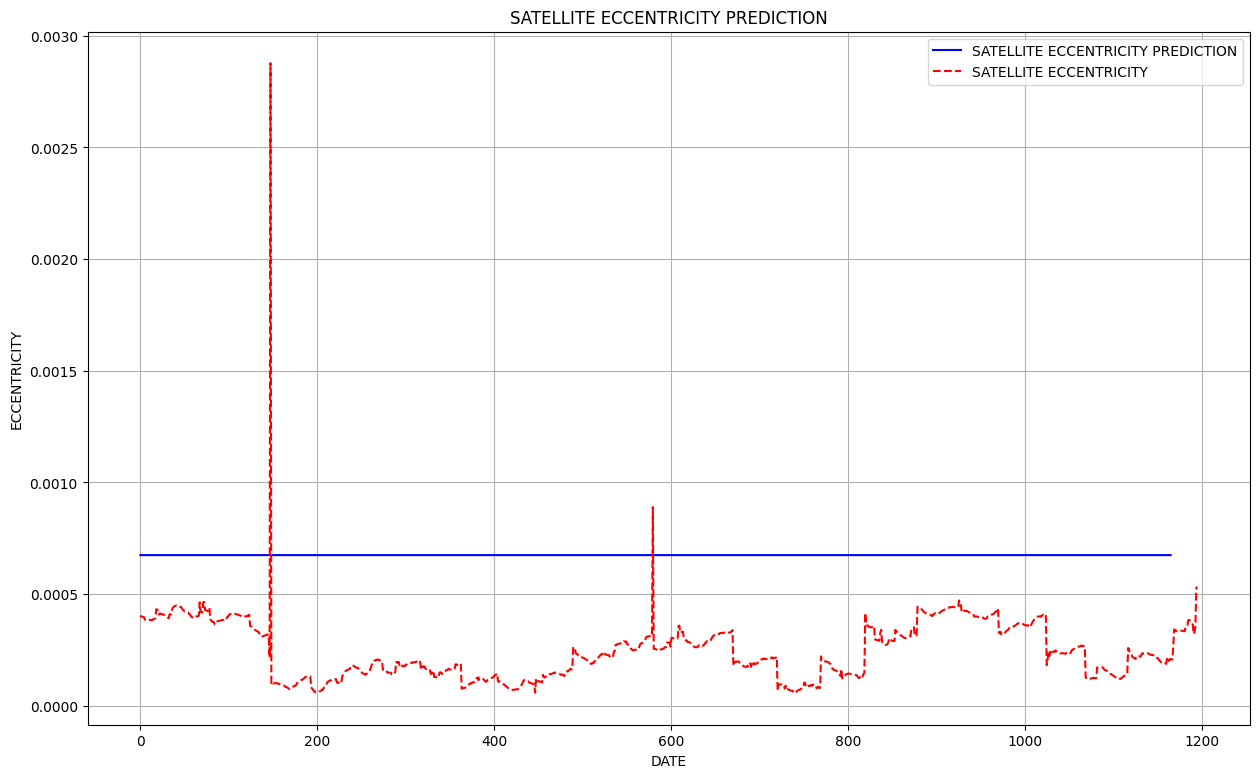

In [530]:
plt.figure(figsize=(15,9))
plt.grid(True)

#print(date_range)
#print(model_predictions)

date_range=testing_data["Datetime"].index

plt.plot(predict, color='blue', linestyle='-', label="SATELLITE ECCENTRICITY PREDICTION")
plt.plot(date_range,df_shift[val_end:][[row]], color='red', linestyle='dashed', label="SATELLITE ECCENTRICITY")

plt.title("SATELLITE ECCENTRICITY PREDICTION")
plt.xlabel("DATE")
plt.ylabel("ECCENTRICITY")
plt.legend()
plt.show()